<a href="https://colab.research.google.com/github/ejini6969/Optimization-Deep-Learning-ODL-/blob/main/NLR_GDP1_(Lab_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing the libraries
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [5]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [6]:
path = "/drive/MyDrive/GDP1.csv"
df = pd.read_csv(path)
df

,Mortality rate,GDP per capita
0,68.1,244.612627
1,64.2,235.531205
2,60.5,240.443328
3,57.2,292.577730
4,54.4,302.678146
...,...,...
56,7.0,9555.651202
57,7.1,9979.800841
58,7.2,11074.064090
59,7.3,11132.023930


In [7]:
corr = df.corr(method = "pearson")
corr.style.background_gradient(cmap = "coolwarm").set_precision(2)

# Strong correlation between GDP per capita and mortality rate but an increase in mortality rate will cause the GDP per capita to decrease gradually as indicated by a negative correlation

<ipython-input-7-634554be02b5>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap = "coolwarm").set_precision(2)


,Mortality rate,GDP per capita
Mortality rate,1.00,-0.74
GDP per capita,-0.74,1.00


In [8]:
df.columns

Index(['Mortality rate', 'GDP per capita'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mortality rate  61 non-null     float64
 1   GDP per capita  61 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [10]:
df.shape

(61, 2)

In [11]:
y = df["GDP per capita"]
x = df.drop("GDP per capita", axis = 1)

In [12]:
x.head()

,Mortality rate
0,68.1
1,64.2
2,60.5
3,57.2
4,54.4


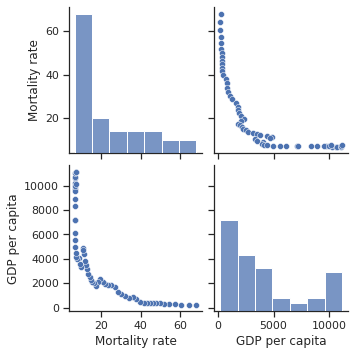

In [13]:
import seaborn as sns
sns.set_theme(style = "ticks")
sns.pairplot(df)
plt.show()
# from histogram, it is left-skewed distribution
# from scatter plot, non-linear pattern is observed. (not necessarily need to plot for non-linear regression)
# pairplot to display in correlation matrix form
# polynomial feature's degree start at 2, then go up, to prevent overfitting in relation to the dataset

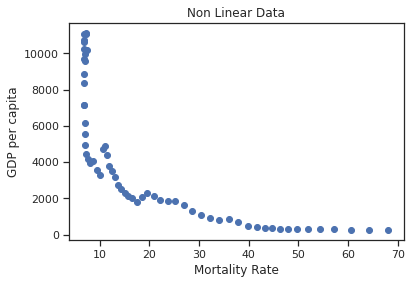

In [14]:
plt.scatter(x, y)
plt.xlabel("Mortality Rate")
plt.ylabel("GDP per capita")
plt.title("Non Linear Data")
plt.show()

In [15]:
x1 = pd.DataFrame.to_numpy(x) # cater for polynomial feature, must use numpy array

In [16]:
# polynomial
poly_features = PolynomialFeatures(degree = 3, include_bias = False) # (x**3); quadratic function (degree = 2: x**2) does not give higher accuracy
x_poly = poly_features.fit_transform(x1)
x1[3]

array([57.2])

In [17]:
x_poly[3] # 57.2*10^1, 57.2*10^3, 57.2*10^5 (degree 3)

array([5.72000000e+01, 3.27184000e+03, 1.87149248e+05])

In [18]:
model = LinearRegression() # justify model based on linear regression, but substitute X with X-polynomial
model.fit(x_poly, y)
print("Coefficients of x are", model.coef_)
print("Intercept value is", model.intercept_)

# predict
y_deg2 = model.predict(x_poly)

Coefficients of x are [-1.07098090e+03  2.64352549e+01 -2.05033138e-01]
Intercept value is 14069.78929143442


In [19]:
# model evaluation
print("MSE of Polyregression model: %.2f" % mean_squared_error(y, y_deg2))
print("R2 score of Non Linear model: ", model.score(x_poly, y))

# Equation for linear regression : Y = B0 + B1X
# Equation for non-linear regression: Y = B0 + B1X + B2X^2 + B3X^3
# Interactions / multiplication between X1 and X2 if > 1 independent feature variable for non-linear regression

MSE of Polyregression model: 2641827.55
R2 score of Non Linear model:  0.7902130663732014


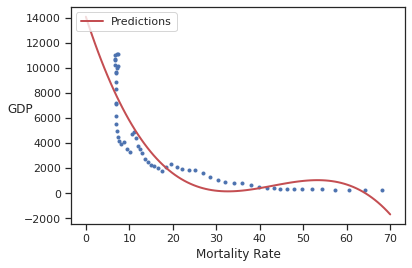

In [20]:
# NO POINT TO SPLIT DATASET (60 rows only), must self-generate test data
x_new = np.linspace(0, 70, 100).reshape(100, 1) # 100 observations between 0 to 70 on X-axis
x_new_poly = poly_features.transform(x_new)
y_new = model.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth = 2, label = "Predictions")
plt.xlabel("Mortality Rate")
plt.ylabel("GDP", rotation = 0)
plt.legend(loc = "upper left")
plt.show()